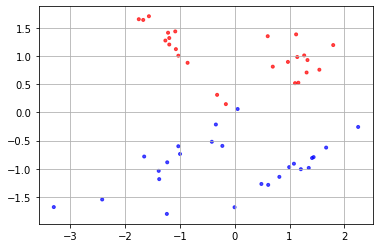

In [3]:
# 分類用のデータを用意する
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# データx、ラベルyを生成
# make_classification: scikit-learnライブラリの分類データを作成する関数
# n_samples: 用意するデータの個数
# n_classes: クラス数、指定しないと値は2になる
# n_features: データの特徴量の個数
# n_redundant: 分類に不要な(余分な)特徴量の個数
# random_state: 乱数のシード(乱数のパターンを決定する要素)
X, y = make_classification(n_samples=50, n_features=2, n_redundant=0, random_state=0)

# データの色付け、プロットの処理
# matplotlib.pyplot.setattr: 散布図を作成する関数
plt.scatter(X[:, 0], X[:, 1], c=y, marker='.', cmap=matplotlib.cm.get_cmap(name='bwr'), alpha=0.7)

plt.grid(True)
plt.show()

In [12]:
# 学習と予測
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, random_state=42)

# データを学習に使う分を表示
# train_test_split: NumPy配列ndarrayやリストなどを二分割できる。機械学習においてデータを訓練用（学習用）とテスト用に分割してホールドアウト検証を行う際に用いる。
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# モデルを構築予測結果(学習方法)
# モデル: 教師データから学習を行い、ラベルを予測するまでの一連の流れの概形
model = LogisticRegression(random_state=42)

# train_Xとtrain_yを使ってモデルに学習させる(学習)
model.fit(train_X, train_y)

# test_Xに対するモデルの分類予測結果(結果)
pred_y = model.predict(test_X)
print(pred_y)

# モデルの正解率
# モデルの予想した分類と実際の分類が一致したデータの数 ÷ データの総数 = 正解率
print(model.score(test_X, test_y))

[0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1]
0.96


<ipython-input-11-083c638d6bd7>:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal', 'datalim')


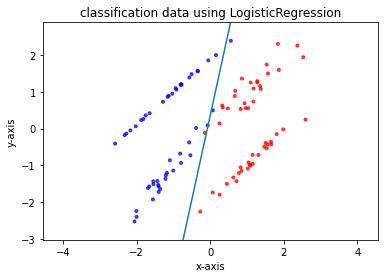

In [11]:
# ロジスティック回帰
# 線形分離可能なデータの境界線を学習によって見つけてデータの分類を行う手法
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
%matplotlib inline

# データを生成
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# モデルを構築
model = LogisticRegression()

# train_Xとtrain_yを使ってモデルに学習
model.fit(train_X, train_y)

# test_Xに対するモデルの分類予想結果を出す
pred_y = model.predict(test_X)

# 生成したデータを散布図にプロットする
plt.scatter(X[:, 0], X[:, 1], c=y, marker='.', cmap=matplotlib.cm.get_cmap(name='bwr'), alpha=0.7)

# 学習して導出下識別境界線をプロット
Xi = np.linspace(-10, 10)
Y = -model.coef_[0][0] / model.coef_[0][1] * Xi - model.intercept_ / model.coef_[0][1]
# いろいろなグラフを重ねて表示することが可能
plt.plot(Xi, Y)

# グラフのスケールを調整
plt.xlim(min(X[:, 0]) - 0.5, max(X[:, 0]) + 0.5)
plt.ylim(min(X[:, 1]) - 0.5, max(X[:, 1]) + 0.5)
plt.axes().set_aspect('equal', 'datalim')

# グラフにタイトルを設定
plt.title('classification data using LogisticRegression')

# x軸、y軸それぞれに名前を設定
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

1.0
<ipython-input-15-721def84d5c5>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal', 'datalim')


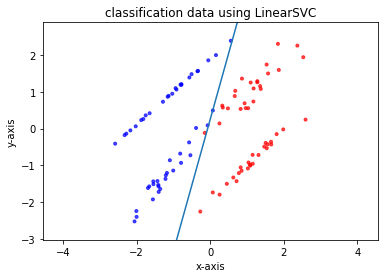

In [15]:
# 線形SVM
# SVM(サポートベクターマシン): ロジスティック回帰と同じくデータの境界線を見つけることでデータの分類を行う手法
# サポートベクター: クラスごとの境界線に最も近いデータと境界線の距離のことを指す
# このサポートベクターの距離の合計を最大化することによって境界線を決定する手法がSVM

# SVMは分類する境界線が2クラス感の最も離れた場所に引かれるためロジスティック回帰と比べて一般化されやすい
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# LinearSVC: 線形SVMのモデル
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
%matplotlib inline

# データを生成
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# モデルを構築
model = LinearSVC()

# train_Xとtrain_yを使ってモデルに学習
model.fit(train_X, train_y)

# test_Xとtest_yを用いたモデルの正解率を出力
print(model.score(test_X, test_y))

# 生成したデータを散布図にプロットする
plt.scatter(X[:, 0], X[:, 1], c=y, marker='.', cmap=matplotlib.cm.get_cmap(name='bwr'), alpha=0.7)

# 学習して導出下識別境界線をプロット
Xi = np.linspace(-10, 10)
Y = -model.coef_[0][0] / model.coef_[0][1] * Xi - model.intercept_ / model.coef_[0][1]
# いろいろなグラフを重ねて表示することが可能
plt.plot(Xi, Y)

# グラフのスケールを調整
plt.xlim(min(X[:, 0]) - 0.5, max(X[:, 0]) + 0.5)
plt.ylim(min(X[:, 1]) - 0.5, max(X[:, 1]) + 0.5)
plt.axes().set_aspect('equal', 'datalim')

# グラフにタイトルを設定
plt.title('classification data using LinearSVC')

# x軸、y軸それぞれに名前を設定
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

In [19]:
# 非線形SVM
# カーネル関数と呼ばれる変換式に従って数学的処理を行いデータを操作することで、
# 入力データが線形分離可能な状態となる場合がある
# そのような処理を行いSVMを用いるモデルのこと
# 生成したデータを散布図にプロットする
from sklearn.svm import LinearSVC
# SVC: 非線形SVMのモデル
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_gaussian_quantiles

# データを生成
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# モデルを構築
model1 = SVC()
model2 = LinearSVC()

# train_Xとtrain_yを使ってモデルに学習
model1.fit(train_X, train_y)
model2.fit(train_X, train_y)

# 正解率を算出
print('非線形SVM: {}'.format(model1.score(test_X, test_y)))
print('線形SVM: {}'.format(model2.score(test_X, test_y)))

非線形SVM: 0.888
線形SVM: 0.872


In [25]:
# 決定木
# データの要素の一つ一つに着目し、その要素内でのある値を境にデータを分割していくことでデータの属するクラスを決定しようとする手法
import requests
import zipfile
from io import StringIO
import io
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# urlを指定
mush_data_url = 'http://archive.ics.uci.edu/mi/machine-learning-databases/mushroom/agaricus-lepiota.data'
s = requests.get(mush_data_url).content
print(s)

# データ形式を変換
mush_data = pd.read_csv(io.StringIO(s.decode('utf-8')), header=None)
print(mush_data)

# データに名前を付ける
mush_data.columns = ["classes", "cap_shape", "cap_surface", "cap_color", "odor", "bruises","gill_attachment", "gill_spacing", "gill_size", "gill_color", "stalk_shape","stalk_root", "stalk_surface_above_ring", "stalk_surface_below_ring","stalk_color_above_ring", "stalk_color_below_ring", "veil_type", "veil_color","ring_number", "ring_type", "spore_print_color", "population", "habitat"]

# カテゴリー変数をダミー特徴量として変換
mush_data_dummy = pd.get_dummies(mush_data[['gill_color', 'gill_attachment', 'odor', 'cap_color']])

# 目的変数のフラグを立てる
mush_data_dummy['flg'] = mush_data['classes'].map(lambda x: a if x == 'p' else 0)

# 説明変数と目的変数を指定
X = mush_data_dummy.drop('flg', axis=1)
Y = mush_data_dummy['flg']

# 学習データとテストデータに分ける
train_X, test_X, train_y, test_y = train_test_split(X, Y, random_state=42)

# モデルを読み込む
from sklearn.tree import DecisionTreeClassifier

# モデルを構築
model = DecisionTreeClassifier()

# モデルに学習させる
model.fit(train_X, train_y)

# 正解率を算出
print(model.score(test_X, test_y))

b'<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">\n<html><head>\n<title>404 Not Found</title>\n</head><body>\n<h1>Not Found</h1>\n<p>The requested URL /mi/machine-learning-databases/mushroom/agaricus-lepiota.data was not found on this server.</p>\n<hr>\n<address>Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips SVN/1.7.14 Phusion_Passenger/4.0.53 mod_perl/2.0.11 Perl/v5.16.3 Server at archive.ics.uci.edu Port 80</address>\n</body></html>\n'
                                                   0
0  <!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//...
1                                       <html><head>
2                       <title>404 Not Found</title>
3                                      </head><body>
4                                 <h1>Not Found</h1>
5  <p>The requested URL /mi/machine-learning-data...
6                                               <hr>
7  <address>Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-...
8                                     </body></html>


ValueError: Length mismatch: Expected axis has 1 elements, new values have 23 elements

In [ ]:
# ランダムフォレスト
# 決定木の簡易版を複数作り、分類の結果を多数決で決める手法
# 複数の簡易分類機を一つの分類機にまとめて学習させるアンサンブル学習と呼ばれる学習の種類の一手法